## Fundamentals of Social Data Science 
# Week 4 Day 3. Wrap up and embeddings 

In this last lecture my goal is to wrap up the course and try to consolidate some of the learning that you have experienced through the course. This will involve a revisiting of the framing of the course as well as providing a bridge to subsequent work in machine learning and social data science. 

Learning goals:
1. Understand how induction, deduction, and abduction work together as a recursive workflow that oscillates between hypothesis generation, data exploration, and claim making. 
2. Reflect on agency in data spaces as motivator. 
3. Understand how a word or a sentence can be encoded as an 'embedding'.
4. Differentiate between embeddings as understood from models and a text vector from a document corpus. 
5. Intuitively appreciate how vector semantics in embedding spaces allows us to appreciate not only classification as distinction but ways we can blend concepts and create novelty. 
6. Appreciate the goals of this class as proficiency with concepts first and code second. 





In [ ]:
# Remember to use pip install -r requirements.txt to install the required packages
# The requirements have been updated to include the gensim package

# Data manipulation
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Network analysis
import networkx as nx
from networkx.algorithms import bipartite
import scipy.sparse as sp

# Word embeddings
import gensim.downloader as api
from scipy.spatial.distance import cosine

## Definition of Reasoning

Reasoning is the process of making sense of patterns observed in the world by applying internally consistent constraints. It allows us to derive meaningful insights and make coherent interpretations from data, which is essential in techniques like t-SNE and k-means clustering.

### Types of Reasoning in Data Science

- **Inductive Reasoning**: Deriving general principles from specific observations. Example: Using k-means clustering to identify common patterns in data.
- **Deductive Reasoning**: Applying general principles to specific cases. Example: Using a pre-defined model to classify new data points.
- **Abductive Reasoning**: Inferring the most likely explanation from incomplete data. Example: Using t-SNE to visualize high-dimensional data and hypothesize underlying structures.

Understanding these types of reasoning helps us appreciate the methodologies behind pattern recognition and data analysis techniques and when to apply one approach over another. 

### Reasoning as an iterative process 

Specific tools for reasoning can exist in a vaccuum. For example, one of the most powerful forms of reasoning is Aristotle's Categorical Syllogisms and the subsequent predicate logic system that is entailed by this framework. You might recognise this form of reasoning as:
- Some dogs are brown
- Lassie is brown
- Therefore Lassie is a dog \[False; incomplete\]

Versus 
- All dogs are playful as puppies
- Lassie is a dog
- Therefore Lassie was playful as a puppy \[True\]

This is not the only form of reasoning but it is certainly one that has considerable power given its specificity and logical consistency. It is for this reason that we tend to deploy this sort of logic when using hypothesis testing and deductive logic. However, within the domain of science, we must step away from this rigid framework from time to time on account of our object of inquiry. For example, why did I choose dogs? Why am I interested in their colour or their playfulness? Then we might ask, how do we characterise playfulness? Would some behaviours be coded as playful by some people but not by others? 

In order to fully account for the potential instability of our concepts or the presence of information which does not quite fit within such clear bounded statements of 'all', 'none', and 'some', we must move beyond deductive logic. 

In reality we tend to use abductive reasoning very regularly. Such reasoning is context and person dependent in a way that deductive reasoning is meant to be more formal and general. We often have hunches based on our own pattern recognition, our familiarity with a topic and current research, and our own internal motivations. Such reasoning allows us to refine the domain and provide a sort of filter on all-possible-phenomena towards specific phenomena where we wish to either infer or test a generalised claim. Such a claim need not generalise eternally to all places and times, but should allow us to provide some form of knowledge transfer between contexts.  

When we have narrowed down our focus to a specific domain, set of actors, or set of claims, this can become our 'object of inquiry'. However, this is not sufficient. We need something to analyse. To recall, this is our 'unit of analysis'. So we might be interested in studying racism, or racism in the workplace as abductively we have a hunch about how this operates. However, we would need to think about whether we are moving from particular to general or general to particular. And this is where inductive and deductive reasoning are activated. 

If we have enough information from prior experience (through papers, intuition, exploratory data analysis, argumentation, etc...) we might settle on general patterns which we then explore in a particular 'site of observation'. This is _deductive reasoning_. We tend to think if it as 'more scientific' because it will create testable claims. In the above case we might say "expressions of casual racism are more prevalent in a workplace where there are observable differences in the racial composition of the organisation by role" (i.e. black people might be overrepresented within different, presumably lower status, positions). This is not a statement of causality. We do not know if the organisation: 
- does not fairly hire candidates,   
- draws upon an available workforce for external reasons,
- implies composition first, racism second, or, racism first, composition second.

We do not need to ensure causality in order to apply deductive logic. Yet, this approach is considered more scientific typically because the end result is the creation of further testable and potentially falsifialbe (or perhaps context-specific) claims. 

On the other hand, we might not know how to measure racism in the first place. There are some obvious markers of racism (direct use of epithets or motivated violence). But there are other markers which might not be obvious or indeed obvious to everyone. People may have hidden biases that are manifested in racially distinct outcomes even if they themselves do not explicitly assert a racial bias or preference. In that sense, we might need to apply inductive logic in order to 'stabilise the constructs'. This might involve classifying comments or comment pairs within some text analysis. It might involve descriptive statistics which are aligned with existing structures (how does this play out _over time_ or _across geography_). With inductive work we don't often _know_ that our results are stable and therefore usable within a deductive framework, but we try a varity of strategies related to 'goodness of fit' in order to assert that our specific classification (or more broadly our way of describing and understanding the system) both does justice to the context and allows for future knowledge transfer. 

Thus you might think of the following iterations: 
~~~
Apply abductive reasoning (abductive) > 
    Have hunch based on observations 
        > If observing particular to determine general (inductive)
    Can articulate hunch via clear existing knowledge 
        > If testing expectations relative to observations (deductive)

Apply inductive reasoning (inductive) > 
    > (Abduction) Space is better characterised for future abductive intuitions (we "get it" more now)
    > (Deduction) Categories might have stability that permits deductive reasoning or undermines prior deductive categories thus requiring us to revisit deductive reasoning. 

Apply deductive reasoning (deductive) > 
    > Claim is falsified 
        > (Abduction) Update internal mental model / abductive reasoning; 
        > (Induction) Consider exploratory work on site to provide better categories to help make sense of topic. 
    > Claim is verified 
        > Consider contextual effects and retest (deductive replication)
        > Explore whether other categories would work even better (induction)
        > Internalise knowledge within this context in general model (abduction)   
~~~

Notice that in the above flow we wouldn't go abductive > abductive. That is theorising about theorising which from our perspective just collapses back into abduction. In my opinion, it is all just abductive reasoning until we get to the place where we can consider observations. 

Similarly we typically wouldn't go inductive > inductive. That is like matching patterns among the patterns. That's possible as patterns can exist on many scales, but it tends to be hard to explain and very provisional. It's like using too many abstractly defined concepts in a model thereby making it difficult to interpret the model. Deductive work in this framework is therefore not the only path to science and we should really move away from considering it as _the_ scientific method. It is a key part of robust scientific claims, but the actual practice of science is far more broad and tends to oscillate between these approaches.

# Agency in data spaces: Reviewing who is the driver 

In sociology (and related social science disciplines) we have the twin notions of structure and agency. Specific characterisations of these vary between thinkers and disciplines, so take my interpretation with a grain of salt. 

Structure provides the opportunities for choice. Structure is not always obvious or given in a declarative manner. You might never read a sign in a store that says 'no trumpets' but if you go into a store blasting a trumpet people will likely see that as a violation of norms. In that sense, structure was loosely defined enough that someone _could_ go into a store and start playing some old jazz standards but still coherent enough that people would start wondering what's happening. They might even try to roll it into their own mental model (are they filming some video for TikTok or something?).

Agency is the process of individuals acting within a structure. It is mainly described as a noun rather than a verb. We don't agency our way through structure, but we exert (or assert) our agency through our interaction with structure. Often this really means going on autopilot because things are set up as we expect and we are just at the store to buy some goods. But sometimes it means deliberately navigating social structures to direct our attention to patterns that might otherwise be left ignored or not acted upon (what is trumpet guy back in the store?). 

When we are doing scientific research we are asserting our agency on the structure of knowledge. We are not merely encoding some information from one medium (e.g., speech) to another medium (e.g., text). That is analysis and a part of scientific research. But the act of being a scientist means making deliberate decisions about how we are going to move the state of knowledge from where it is to where it could be once we observe and consider the world. 

Consider when working with AI coding assistants: if you ask for help filtering a DataFrame, the AI might provide not just the requested filter but additional analysis functions, plotting code, or metrics you didn't ask for. While these additions might be technically valid and even helpful, they represent the AI asserting its own form of agency - potentially introducing concepts or approaches you haven't learned yet or hadn't planned to use. As social data scientists, you need to maintain control over your analytical process - understanding not just what code does, but why you're using particular approaches and how they relate to your research questions. This means being able to critically evaluate and sometimes reject AI suggestions, even when they're technically correct.

In your work, you must understand your own agency as a scientist. You thus must be able to understand how we interface with structure. If you let the AI choose a model, you must be able to reject its choice if you think it is wrong, or provide reasons why you think that's a good choice. By asserting agency you are deciding where to locate your attention in the world and how you think that is a worthy use of research time. This is how we link agency to motivation. All research in science should be motivated in some way. We either motivate it by applying the scientific process to our intuitions (so that we can account for potential biases in our observations) or by applying it to a context where we might already know something. 


# Revisiting Research Questions 

Heretofore I have not emphasised research questions as much as one might expect. There were many cases of 'just go and play with data'. This is not because I think we should just go hunting for patterns and then report what we find. It is because I wanted you to consider the many choices available and thereby recognise your own agency in the process. In formal work, you should now consider how you can motivate your choice of context, means of observation, and choice of analytical tools. This is how you assert your own agency and it is manifested in your research question. 

The research question is not a hypothesis. A well-formed hypothesis is sufficient for scientific work, but it is not necessary. We do not need a falsifiable hypothesis to contribute to scientific understanding. However in the communication of science we almost always need a research question (implicitly or explicitly described). We might go so far as to say a research question is necessary rather than sufficient. The RQ is not a question that is directly answered with yes/no|true/false, that is a hypothesis. It is like a semantic vector. It is meant to move our thinking from a more general set of propositions or claims towards a more focused set where we can apply deductive or inductive reasoning. 

With the benefit of hindsight from your experiences in exploring data spaces, I hope you can now see where the research question fits in. It is not necessarily prior to your exploration of work. You can explore data, read papers, get intuitions without a specific research question. But in order to translate your insights and intuitions into something that will suit knowledge transfer between people, a research question is a key and effective _focusing device_. Further, the presence of a research question does not facilitate a better focus, you probably need to revisit the specificity of your research question. It does not need to be perfectly focused in an almost mechanistic way, but it needs to be sufficiently focused that we know how to proceed given a setup. 

# A review of the core concepts explored in this class 

Up to this point we have not used data models explicitly. We have data and then we analyse the data. Whether we are looking at Wikipedia pages, reddit posts, Stack Exchange, or Network data, we were trying to manipulate the data so that it reveals patterns and tests claims. 

These claims have focused on several key distinctions: 
- What is the unit of analysis?
    - This will eventually be a row in a table. 
    - We can aggregate rows thereby allowing us to consider a more general construct as our unit of analysis (instead of dyads of person-friend we aggregate to an overall person score, or we look at the rates between countries or subreddits). 
    - We can propagate data from a more general construct into a more granular set of observations (i.e. one to many merge; use data at the country level to inform observations at the person level). 
- Is the data orderable or not: 
    - Two orderable distributions allow us to use tools like correlation: If A goes up does B go up?
    - Two categorical distributions allow us to use tools like Chi-square: Do cells in a table have more observations or less than expected?  
    - A categorical and an orderable distrubtion allows us to test differences between groups like a t-test or ANOVA: Are the groups sufficiently distinct given their average score, sample size and the variance?
- Are we interested in distance or difference: 
    - Are we seeking to clarify whether two things are sufficiently distinct (difference)
    - Are we seeking to understand the relative similarity of things (distance)
- Will we do an inductive or deductive analysis:
    - This is covered above 
- How do we normalise our data? 
    - Do we need to shift our unit of analysis? (i.e. looking at posts per day to account for differences over time)
    - Do we need to account for class imbalance? (i.e. doing a Jaccard with one really big set and one small set)
    - Do we account for distributions somehow (i.e. using the inverse document frequency vector to weight term frequency matrix)
- How can we characterise uncertain concepts through relations?
    - With words we can think of them via TF-IDF as allowing us to explore terms in relation to documents, not just as raw counts or bag of words. 
    - With people we can think of them as located within a network rather than just a set of psychological attributions. 

Please consider to focus on these specific questions as key considerations in your own research generating activities. 

# Embeddings: One last practical skill 

With all that said, I want to provide some space for one last practical skill: embeddings. We have implicitly been making embeddings for a while. These are vectors that represent some data object within some data space. So a TF-IDF term vector represents the term within the data space of the documents. We then compare these vectors to see whether one word is similar to another. Yet we need not create our own data spaces for this. We can use existing data spaces and increasingly do so. These data spaces are known as 'pre-trained models' within machine learning. 

This fact existed for a while, but only in the last ten years or so has it really sunk in that this was possible. The reason being is that early models were really simple and stupid. We can look at those first. 

We looked at a bipartite network in the last lab. Like people who buy the same books or people who posted on the same subreddit. This is a bipartite network (one class only connects to another class). But if two nodes have lots of connections, they would show up as stronger. I did not spend much time on it being at the end of a lecture on networks. But we should revisit the concept here and look at a bipartite projection. This is because this is effectively what we did with the words. So rather than think of the words just as vectors, think of them as nodes in a network. Then we will do a _projection_ where we connect all the two paths. Such as: 

~~~
person_1, book_1
person_1, book_2
person_2, book_1
person_2, book_2
person_3, book_1

becomes

person_1, person_2, 2 books in common
person_1, person_3, 1 books in common
person_2, person_3, 1 books in common
~~~

Now we have a network where most of the nodes end up connected but the strength of the connection matters. Below is an example two-mode network with students and classes. We will first look at the 2-mode network. I will use a layout specifically useful for 2-mode networks. 

Then I will print this network as an adjacency matrix. So you can see its students by classes. Then in order to get the student to student network, we multiply the network by its transpose. Now if you aren't familiar with matrix multiplication, you might not have an intuitive sense of how this happens. That's outside the scope of this course but you should explore materials for this (again unsurprisingly I recommned 3blue1brown, in this case: chapters 7 and 8. https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab ). Since we have a student by class matrix if we have the classes in the columns, they are our column vectors. If we mutiply it by the transpose we discover where those column vectors land in relation to each other. If we switch it around so we have class by students and we then have students in the columns, we do the same thing and get where the student vectors land in relation to each other. Observe with some plots: 


In [25]:
# Typed student course selections
student_choices = [
    ("Student_1", "NLP", "Networks"),
    ("Student_2", "AML", "Econ"),
    ("Student_3", "Fairness", "NLP"),
    ("Student_4", "Networks", "AML"),
    ("Student_5", "Econ", "Fairness"),
    ("Student_6", "NLP", "AML"),
    ("Student_7", "Networks", "Econ"),
    ("Student_8", "Fairness", "Networks"),
    ("Student_9", "AML", "NLP"),
    ("Student_10", "Econ", "Networks"),
    ("Student_11", "NLP", "Fairness"),
    ("Student_12", "AML", "Networks"),
    ("Student_13", "Fairness", "Econ"),
    ("Student_14", "Networks", "NLP"),
    ("Student_15", "Econ", "AML"),
    ("Student_16", "Fairness", "Networks"),
    ("Student_17", "NLP", "AML"),
    ("Student_18", "Networks", "Econ"),
    ("Student_19", "AML", "Fairness"),
    ("Student_20", "NLP", "Networks")
]

# Create DataFrame
df = pd.DataFrame(student_choices, columns=['Student', 'Course1', 'Course2'])
print("Original data as an edge list:")
display(df)

# Reshape to long format
df_long = pd.melt(df, 
                  id_vars=['Student'],
                  value_vars=['Course1', 'Course2'],
                  var_name='choice',
                  value_name='Course')

# Show long transformation 
print("Transformed data as long format:")
display(df_long.head())

Original data as an edge list:


,Student,Course1,Course2
0,Student_1,NLP,Networks
1,Student_2,AML,Econ
2,Student_3,Fairness,NLP
3,Student_4,Networks,AML
4,Student_5,Econ,Fairness
5,Student_6,NLP,AML
6,Student_7,Networks,Econ
7,Student_8,Fairness,Networks
8,Student_9,AML,NLP
9,Student_10,Econ,Networks


Transformed data as long format:


,Student,choice,Course
0,Student_1,Course1,NLP
1,Student_2,Course1,AML
2,Student_3,Course1,Fairness
3,Student_4,Course1,Networks
4,Student_5,Course1,Econ


In [26]:
courses = df_long['Course'].unique()
students = df_long['Student'].unique()

student_course_matrix = np.zeros((len(students), len(courses)))
B = student_course_matrix

# Fill matrix
for i, student in enumerate(students):
    student_courses = df_long[df_long['Student'] == student]['Course']
    for course in student_courses:
        j = np.where(courses == course)[0][0]
        B[i, j] = 1 
        
# Display matrix
# display(pd.DataFrame(B, index=students, columns=courses))
# Display matrix with styled formatting
(pd.DataFrame(B, index=students, columns=courses)
 .style
 .format("{:.0f}")  # Remove decimals
 .background_gradient(cmap='YlGnBu', vmin=0, vmax=1)  # Color non-zeros
 .highlight_between(left=0, right=0, props='color:gray; background-color:#f8f9fa')  # Style zeros
 .set_caption("Biadjacency Matrix (notice prevalence of zeros)")
)

,NLP,AML,Fairness,Networks,Econ
Student_1,1,0,0,1,0
Student_2,0,1,0,0,1
Student_3,1,0,1,0,0
Student_4,0,1,0,1,0
Student_5,0,0,1,0,1
Student_6,1,1,0,0,0
Student_7,0,0,0,1,1
Student_8,0,0,1,1,0
Student_9,1,1,0,0,0
Student_10,0,0,0,1,1


In [27]:
# Calculate projections
student_student = np.dot(B, B.T)
course_course = np.dot(B.T, B)

print("\nStudent-Student projection (BB^T):")
display(pd.DataFrame(student_student, index=students, columns=students))

print("\nCourse-Course projection (B^TB):")
display(pd.DataFrame(course_course, index=courses, columns=courses))



Student-Student projection (BB^T):


,Student_1,Student_2,Student_3,Student_4,Student_5,Student_6,Student_7,Student_8,Student_9,Student_10,Student_11,Student_12,Student_13,Student_14,Student_15,Student_16,Student_17,Student_18,Student_19,Student_20
Student_1,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0
Student_2,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0
Student_3,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
Student_4,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Student_5,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
Student_6,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0
Student_7,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0
Student_8,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0
Student_9,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0
Student_10,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0



Course-Course projection (B^TB):


,NLP,AML,Fairness,Networks,Econ
NLP,8.0,3.0,2.0,3.0,0.0
AML,3.0,8.0,1.0,2.0,2.0
Fairness,2.0,1.0,7.0,2.0,2.0
Networks,3.0,2.0,2.0,10.0,3.0
Econ,0.0,2.0,2.0,3.0,7.0


In [ ]:
# Here we have to take our matrix, which is full rank and convert it to
# a sparse matrix to use with NetworkX

# Option 1: Using csr_matrix (Compressed Sparse Row format)
A_sparse = sp.csr_matrix(student_course_matrix)

# Option 2: Using csc_matrix (Compressed Sparse Column format)
# A_sparse = sp.csc_matrix(A)

# Now use the sparse matrix
G_bipartite = bipartite.from_biadjacency_matrix(A_sparse)


# Add node labels (since from_biadjacency_matrix uses integers)
student_map = {i: students[i] for i in range(len(students))}
course_map = {i+len(students): courses[i] for i in range(len(courses))}
mapping = {**student_map, **course_map}

G_bipartite = nx.relabel_nodes(G_bipartite, mapping)

# Verify bipartite sets
print("Level 1 nodes:", [n for n in G_bipartite.nodes() if n in students])
print("Level 2 nodes:", [n for n in G_bipartite.nodes() if n in courses])

Level 1 nodes: ['Student_1', 'Student_2', 'Student_3', 'Student_4', 'Student_5', 'Student_6', 'Student_7', 'Student_8', 'Student_9', 'Student_10', 'Student_11', 'Student_12', 'Student_13', 'Student_14', 'Student_15', 'Student_16', 'Student_17', 'Student_18', 'Student_19', 'Student_20']
Level 2 nodes: ['NLP', 'AML', 'Fairness', 'Networks', 'Econ']


In [29]:
# Student-student and course-course projections
G_students = nx.from_numpy_array(student_student)
G_students.remove_edges_from(nx.selfloop_edges(G_students))

G_courses = nx.from_numpy_array(course_course)
G_courses.remove_edges_from(nx.selfloop_edges(G_courses))

# Add node labels after creation
mapping = {i: students[i] for i in range(len(students))}
G_students = nx.relabel_nodes(G_students, mapping)

mapping = {i: courses[i] for i in range(len(courses))}
G_courses = nx.relabel_nodes(G_courses, mapping)

print(G_bipartite, G_students, G_courses, sep="\n\n")


Graph with 25 nodes and 40 edges

Graph with 20 nodes and 129 edges

Graph with 5 nodes and 9 edges


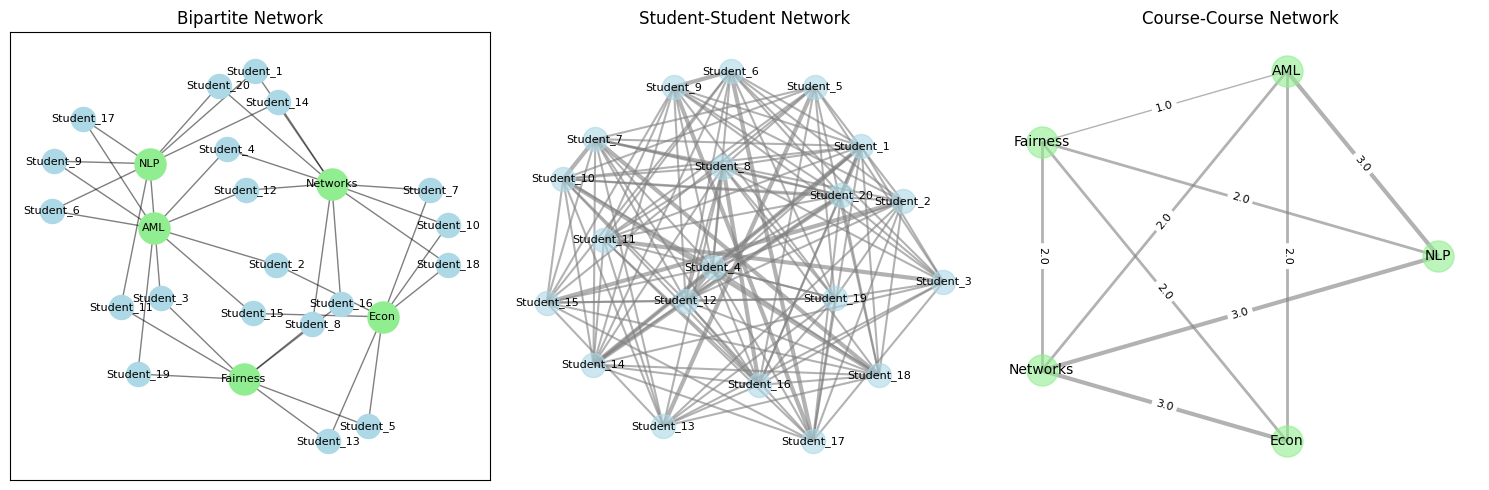

In [30]:
# Plotting
plt.figure(figsize=(15, 5))

########################################################################################
# Bipartite plot
plt.subplot(131)
pos = nx.spring_layout(G_bipartite)
nx.draw_networkx_nodes(G_bipartite, pos,
                      nodelist=students, #[n for n in G_bipartite.nodes() if n in students],
                      node_color='lightblue',
                      node_size=300)

nx.draw_networkx_nodes(G_bipartite, pos,
                      nodelist=courses, #[n for n in G_bipartite.nodes() if n in courses],
                      node_color='lightgreen',
                      node_size=500)

nx.draw_networkx_edges(G_bipartite, pos, alpha=0.5)
nx.draw_networkx_labels(G_bipartite, pos, font_size=8)
plt.title("Bipartite Network")

########################################################################################
# Student projection
plt.subplot(132)

weights = [G_students[u][v]['weight'] for u,v in G_students.edges()]

pos = nx.kamada_kawai_layout(G_students)

nx.draw(G_students, pos,
        node_color='lightblue',
        node_size=300,
        width=[w/max(weights)*3 for w in weights],
        edge_color='gray',
        alpha=0.6)

nx.draw_networkx_labels(G_students, pos, font_size=8)

plt.title("Student-Student Network")

########################################################################################
# Course projection
plt.subplot(133)

edge_labels = {(u, v): f"{G_courses[u][v]['weight']}" for u,v in G_courses.edges()}

weights = [G_courses[u][v]['weight'] for u,v in G_courses.edges()]

pos = nx.circular_layout(G_courses)

nx.draw(G_courses, pos,
        node_color='lightgreen',
        node_size=500,
        width=[w/max(weights)*3 for w in weights],
        edge_color='gray',
        alpha=0.6)

nx.draw_networkx_labels(G_courses, pos, font_size=10)
nx.draw_networkx_edge_labels(G_courses, pos, edge_labels=edge_labels, font_size=8)

plt.title("Course-Course Network")

plt.tight_layout()
plt.show()

# Returning to text: Words and Documents 

So you might be wondering - can we do this with the TF-IDF matrix? And the answer is yes indeed you can. You can do it with the term-frequency matrix (i.e. the 'count matrix') or with the TF-IDF matrix. Both are really just two-mode networks, but they are merely weighted differently. 

Now what if you did that not with 3 or 30 reddit posts but a gigantic corpus? Then projected that gigantic corpus into term-space? Well, that's a sort of trivial version of a "large language model". And in fact, that's precisely how one of the earliest interesting language models was made: GloVe ("global vectors for word representation") is like a giant term-wise projection of a document-term matrix (but gone through extra steps to compress the data using Weighted Least Squares). The specific GloVe model we show below has over a million terms in it and was trained on over a billion tweets. Yet, they compressed it down to 25 features. So instead of $1.2M * 1.2M$, its whittled down to $1.2M*25$. Otherwise, representing $1.2M$ terms × $1B$ tweets as a term-document matrix would be computationally infeasible.

Now this is where it gets interesting for me. A GloVe model will have a vector for every term. That's like the column in our student-student matrix. So now you can get vectors and do cosine similarity not in a small corpus but in a very large one. 

To do the examples below you will need to download a GloVe model. Now I will also compare this to another model called word2vec, which is pretty similar to this except instead of doing a word-to-document matrix, it uses skip-grams so that words that precede or follow a word have a link instead. But similarly after creating edges like first_word <> second_word, second_word <> third_word, it then goes through a transformation in order to produce a similarly usable structure that you could think of as a network. 

When interpreting these two models consider that Word2Vec should reveal patterns about the context of the word, given that it's specifically trained to predict nearby words within a fixed window before and after each target word. On the other hand, GloVe gives a more overall view of how these concepts fit together, kind of like how a bipartite projection can show the overall similarity between two students or two classes within its data space.

In [31]:
# Note: For this to work I had to revert to numpy 1.26.4 which is now pinned in the requirements.txt file
import gensim.downloader as api

# The downloader should give feedback on the download
# It should report a 104.8MB model or say it's already downloaded
glv = api.load('glove-twitter-25')

# WARNING: This model is 1662.8MB
# It should report a 1662.8MB model or say it's already downloaded
wv = api.load('word2vec-google-news-300')



In the following example, we can now query words as tokens. They might not be in the data, in which case it will give a key error. If it is in the data `model['term']` will return a vector much like our term vector. This we would call an _embedding_. But we can use it like a vector. 

Notice that Word2vec is about skip-grams and GloVe is about global term similarity. So when we look at the cosine distance in these examples they will give very different scores. In the first case, we can look at "techno", "music", and "building". People might dance to techno in a building and you might experience the building and dropping of energy in a set. But realistically you would rarely see the words "techno" and "building" that close together. Thus their similarity will be lower in Word2vec than in GloVe. Then when we look at king and queen, notice how this changes. King and Queen are very similar in Word2Vec since the phrase "king and queen" is pretty common. However, they are also conceptually similar so we still see some patterns in GloVe. 

Word2Vec Similarities:
--------------------
techno     - music     : 0.480
techno     - building  : 0.064
music      - building  : 0.036

GloVe Similarities:
------------------
techno     - music     : 0.683
techno     - building  : 0.553
music      - building  : 0.707


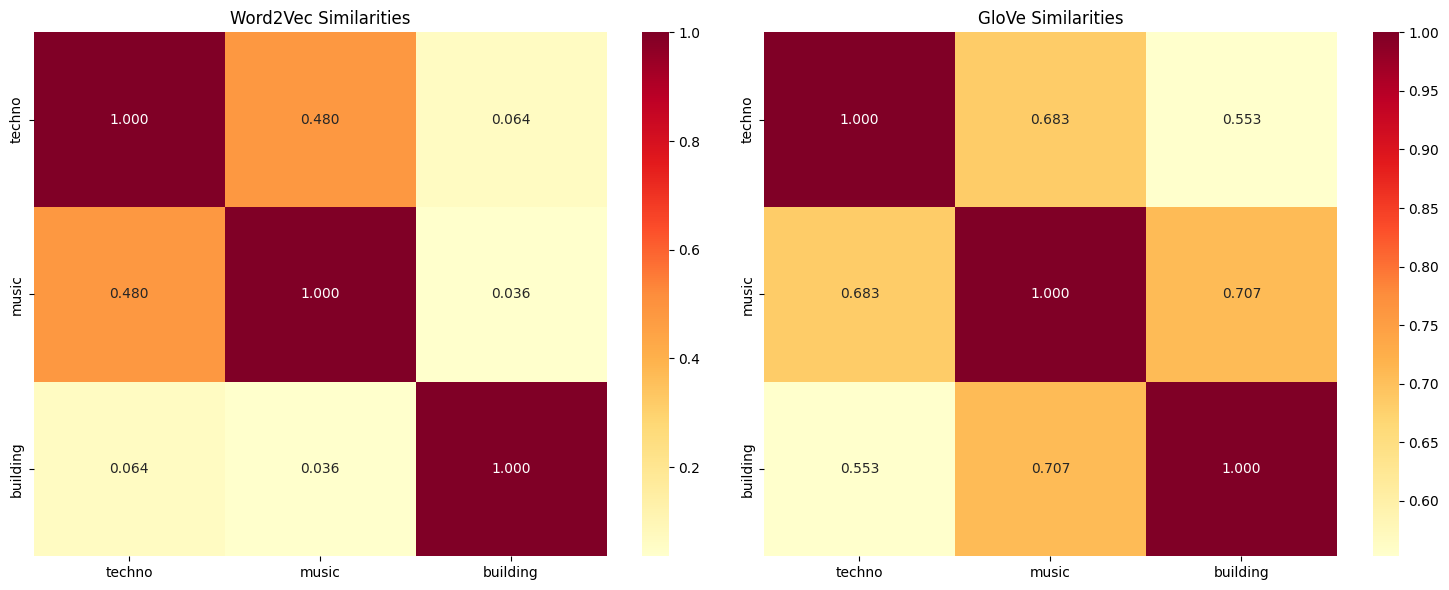

Word2Vec Similarities:
--------------------
king       - queen     : 0.651
king       - man       : 0.229
queen      - man       : 0.167

GloVe Similarities:
------------------
king       - queen     : 0.920
king       - man       : 0.767
queen      - man       : 0.680


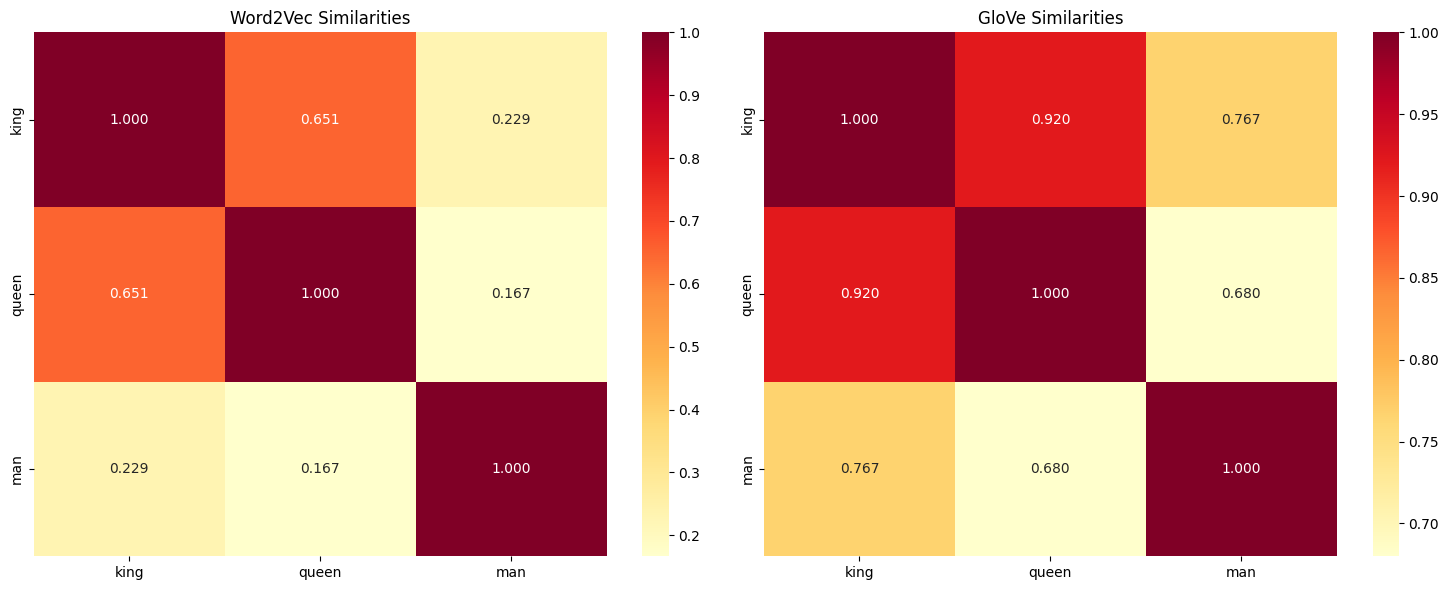

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from utils.analysis import analyze_word_similarities

# Example usage
techno_words = ['techno', 'music', 'building']
analog_words = ['king', 'queen', 'man']

# Note the code 'under the hood' is in the utils/analysis.py file
# It uses wv.similarity(w1, w2) and glv.similarity(w1, w2) to calculate similarities
wv_techno, glv_techno = analyze_word_similarities(techno_words, wv, glv)
wv_analog, glv_analog = analyze_word_similarities(analog_words, wv, glv)

Although under the hood this approach used `wv.similariry(w1, w2)` to illustrate that this is simple a cosine similarity score of two vectors, we can access those vectors directly with `wv[<term>]`, like a dictionary or like `g.node[0]` which will return its neighbors. 

Let's do that for "techno", "music", and "building", check the length of the vectors, do cosine distance and report the scores. Then scroll up to compare.

In [33]:
from scipy.spatial.distance import cosine

w1 = "techno"
w2 = "music"
w3 = "building"

print(f"The length of a word2vec vector (e.g. {w1}) is {len(wv[w1])}")
print(f"The word2vec vector has {len(wv)} keys")
print(f"The length of a GloVe vector (e.g., {w2}) is {len(glv[w2])}")
print(f"The word2vec vector has {len(glv)} keys")
    
print("Cosine Similarity using word2vec directly:")
similarity = 1 - cosine(wv[w1], wv[w2])
print(f'Similarity between {w1} and {w2}: {similarity:0.3f}')

similarity = 1 - cosine(wv[w1], wv[w3])
print(f'Similarity between {w1} and {w3}: {similarity:0.3f}')

similarity = 1 - cosine(wv[w2], wv[w3])
print(f'Similarity between {w2} and {w3}: {similarity:0.3f}')

print("Cosine Similarity using GloVe directly:")
similarity = 1 - cosine(glv[w1], glv[w2])
print(f'Similarity between {w1} and {w2}: {similarity:0.3f}')

similarity = 1 - cosine(glv[w1], glv[w3])
print(f'Similarity between {w1} and {w3}: {similarity:0.3f}')

similarity = 1 - cosine(glv[w2], glv[w3])
print(f'Similarity between {w2} and {w3}: {similarity:0.3f}')


The length of a word2vec vector (e.g. techno) is 300
The word2vec vector has 3000000 keys
The length of a GloVe vector (e.g., music) is 25
The word2vec vector has 1193514 keys
Cosine Similarity using word2vec directly:
Similarity between techno and music: 0.480
Similarity between techno and building: 0.064
Similarity between music and building: 0.036
Cosine Similarity using GloVe directly:
Similarity between techno and music: 0.683
Similarity between techno and building: 0.553
Similarity between music and building: 0.707


Notice once we have the vectors we can then see their shape:
- Glove embedding length: 25
- Number of embeddings: 1.2M
- Word2Vec embedding length: 300
- Number of embeddings: 3M
 
So this is compression of the term-document matrix into a smaller space where 300 coordinates can distinguish each word from each other word in the 'term space' and also allow us to locate nearby words. Within this space we can do some interesting things. Since each vector represents a movement in the space, we can take King - Queen and see if the location ends up near "Man". 

In [34]:
wv1 = wv['King']
wv2 = wv['Queen']
wv3 = wv1 - wv2

similar_words = wv.most_similar(wv3, topn=10)

print(f'Using word2vec:')
print("\n".join([f"{word}: {val:0.3f}" for word,val in similar_words]))
print() 

glv1 = glv['king']
glv2 = glv['queen']
glv3 = glv1 - glv2

similar_words = glv.most_similar(glv3, topn=10)

print(f'Using glove:')
print("\n".join([f"{word}: {val:0.3f}" for word,val in similar_words]))

Using word2vec:
L._Marcellino: 0.312
M._Levin_D-Mich.: 0.311
Bon_Jovi_Canillas: 0.311
King: 0.307
Pio_Roda: 0.303
N._Venzke: 0.300
Rex_Stribling: 0.300
F._Glisan: 0.297
Zaner_Group: 0.297
LaDainian_Tomlinson_Edgerrin_James: 0.295

Using glove:
peaje: 0.686
plkst: 0.681
viaducto: 0.670
квартале: 0.668
пробег: 0.668
τρίτη: 0.658
πέμπτη: 0.658
τετάρτη: 0.645
guamacho: 0.644
metrobus: 0.639


In [35]:
import numpy as np

def vector_arithmetic_demo(glv_model, word1, word2, target_word):
    """
    Demonstrate vector arithmetic with GloVe embeddings.
    
    Args:
        glv_model: GloVe model
        word1: First word (e.g., 'king')
        word2: Second word (e.g., 'queen')
        target_word: Target word to add (e.g., 'man')
    """
    # Get vectors
    vec1 = glv_model[word1]
    vec2 = glv_model[word2]
    target_vec = glv_model[target_word]
    
    # Perform vector arithmetic
    result_vec = vec1 - vec2  + target_vec
    
    # Find most similar words to the resulting vector
    similar_words = glv_model.similar_by_vector(result_vec, topn=50)
    
    # Print results
    print(f"Vector arithmetic: {word1} - {word2} + {target_word}")
    print("Most similar words to the resulting vector:")
    for word, similarity in similar_words:
        print(f"{word}: {similarity:.3f}")

# Example usage
vector_arithmetic_demo(glv, 'king', 'man', 'woman')
# vector_arithmetic_demo(glv, 'paris', 'france', 'italy')

Vector arithmetic: king - man + woman
Most similar words to the resulting vector:
meets: 0.846
crow: 0.785
voices: 0.778
woman: 0.778
widow: 0.773
mercy: 0.772
soldier: 0.772
shepherd: 0.766
hunter: 0.762
treasure: 0.762
african: 0.762
japanese: 0.761
hedgehog: 0.761
prince: 0.761
elephant: 0.760
billionaire: 0.759
’s: 0.756
queen: 0.753
father: 0.752
rogue: 0.752
ivy: 0.751
child: 0.750
rabbit: 0.750
nature: 0.749
anchor: 0.749
singer: 0.748
russian: 0.747
lion: 0.747
daughter: 0.744
swan: 0.744
king: 0.743
ocean: 0.739
shadow: 0.738
hero: 0.738
tiger: 0.736
inner: 0.735
monkey: 0.734
foster: 0.733
mother: 0.733
slave: 0.733
creator: 0.732
sailor: 0.732
stone: 0.732
christian: 0.731
sinatra: 0.730
trump: 0.728
traveler: 0.728
signs: 0.727
fortune: 0.727
lover: 0.726


Okay so it took a while to get "queen". These embeddings are not that great; they are based on a restricted data set and frankly word co-occurence isn't really that smart of a way to interpret text, even at scale. But they are simple models that can get us started. 

The interesting thing, and this is where we are in social data science, is that embeddings are directly related to these fancy machine learning models we are using today. Effectively _every_ promt you send to ChatGPT is transformed into an embedding, or a vector representing the text. That being said, the embeddings to LLMs are not static embeddings like these vectors but a more advanced type called 'contextual embeddings'. The details of context do matter when interpreting these models, but for this discussion the point is that we can locate data in a data space and then use this to compare fruitfully to other data either elsewhere in the model, or to compare to data that we bring to the models ourselves.  

You may or may not ever fully understand the specific architecture under the hood for a new frontier model or some fancy ML. However, you should be able to understand and appreciate that to get there we must take data from the world and turn it into some form that typically ends up being a vector. We can use these vectors to locate where things are in a space relative to each other and when things are distinct enough to assert a categorical difference (like a community detection or a k-means classification). This is where data science goes beyond data analytics. We are not simply shaping and reporting data. We are understanding the data spaces that are produced from trying to order large quantities of data in the same model. The models _are_ the products of machine learning, but they are also the products of the data that goes in. And so they are neither perfect nor optimal, but they are a distillation of knowledge and so far their trajectory is pretty impressive.  

That being said, I want to end this by showing rather than telling. Some models work with text and transformer models are especially good for that. But for images we have found that 'diffusion models' tend to work really well to create an image. But! These diffusion models take in...you guessed it...embeddings. So if we have an embedding for one concept, such as cat and another, such as dog, we can ask the model for something in the middle. Now the entire tool chain to do that is pretty complicated and mostly people just work with prompts. You can work with diffusion models directly in Python, but I don't. So instead, I've pasted some images into the `example_data` folder and appended them below. 

I want these images to be a reminder that in these data spaces we can manipulate the data in all kinds of fascinating ways. In doing so we are pushing the data around, warping it, and trying to find order in the chaos. We are not uncovering the truth just through merging vectors, we are constructing something which we think makes sense. But just because we can produce a catdog in a program does not mean there's a catdog in real life. We still must apply some principles of reasoning about what comes out of these models.

These tools are powerful, extremely powerful, and they will open up new ways of seeing in the social sciences and new ways of doing. In the rest of this degree, you will be able to look deeper under the hood at these tools and understand how you can apply them to questions of social science importance. They might be as stimuli in an experiment or as object of inquiry in their own right. But machine learning and AI are not trends. They represent extensions to our ability to project data into increasingly high dimensional and complex spaces.

We may ask how these patterns came to be, what is the provenance of the data and how might that affect our ability to infer in the world. We might ask whether using an external model is even necessary when simpler more efficient models will suffice. But ultimately, we now have to come to terms with what the patterns that emerge will _do_ to our world as they are fed back in chat programs, government systems, health care, social media  and so forth. We can start by considering what we will do with the ability to access, shape, and utilise these patterns in our own thinking about the world. You have enabled me to do that as a part of this course and for that I'm grateful. 

Thank you for a lovely and challenging class this year.

# AI Declaration 

This lecture was written from start to finish almost entirely by hand, after I found myself temporarily rate-limited from extended conversations with Claude. While working in VS Code, Claude 3.5 Sonnet (new) helped format text in the inductive/deductive sectionand assisted with many code sections - though these needed significant retooling to align with the matrix operations we'd already covered rather than introducing more complex approaches. ChatGPT 4 provided in-line code tweaks in VS Code. Once my rate limit cleared, Claude helped tighten the language around GloVe embeddings and refine the Agency and AI discussion.

And of course, this lecture's demonstration required using AI itself: Felix, our Chimeow (credit to Claude for naming...it), emerged through Stable Diffusion's img2img process. Starting with a cat image, adding noise, and steering toward "dog" in the embedding space produced this image. Hopefully this can illustrate how vectors can blend semantic concepts while maintaining photorealistic features.

![Felix the Chimeow - a cat-dog hybrid created through img2img transformation](example-data/felix_chimeow.jpg)

How Claude sees Felix
---

Claude: This image is fascinating as it appears to be a perfect blend between cat and dog characteristics - a great example of what happens in the latent space between two concepts. It looks like a Chihuahua-cat hybrid with:

Cat features:
- The facial structure and eyes are very cat-like
- The white chest fur pattern and general fur texture
- Whiskers and nose shape
- The way it's positioned (very cat-like lounging pose)

Dog features:
- The ears are distinctly dog-like (pointed but floppier than cat ears)
- The brown/white coloring is reminiscent of a Chihuahua or Papillon
- The paws look more dog-like than cat claws
- There's something about the expression that's more "dog-like" - that eager/alert look

For a name that captures this blend, perhaps:
- "Chimeow" (Chihuahua + meow)
- "Felix" (means "lucky" and works for both cats and dogs)
- "Cog" or "Dat" (though these are perhaps too obvious!)

This image would be perfect for demonstrating how embedding spaces can create meaningful interpolations between concepts while maintaining photorealistic quality. The fact that it looks like a plausible animal rather than a glitchy mess shows how well these models have learned to blend semantic features.